## **Importing Data**


In [1]:
import pandas as pd

In [2]:
ratings_df = pd.read_csv('/content/ratings.csv')
books_df = pd.read_csv('/content/books.csv')
tags_df = pd.read_csv('/content/tags.csv')
book_tags_df = pd.read_csv('/content/book_tags.csv')

## **Data Processing**

*ratings*

In [3]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
ratings_df.isnull().values.any() #check if any values are null

False

In [5]:
ratings_df.loc[ratings_df.duplicated(keep = False),:] #check for duplicates

,user_id,book_id,rating


In [6]:
ratings_df.shape

(5976479, 3)

In [7]:
len(ratings_df)

5976479

*books*

In [8]:
books_df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [9]:
books_df.isnull().values.any() #check if any values are null, if it returns True then where are. We will remove these later

True

In [10]:
books_df.loc[books_df.duplicated(keep = False),:] #check for duplicates

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url


In [11]:
books_df.shape

(10000, 23)

In [12]:
len(books_df)

10000

*tags*

In [13]:
tags_df.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [14]:
tags_df.isnull().values.any() #check if any values are null

False

In [15]:
tags_df.loc[tags_df.duplicated(keep = False),:] #check for duplicates

,tag_id,tag_name


In [16]:
tags_df.shape

(34252, 2)

*book tags*

In [17]:
book_tags_df.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [18]:
book_tags_df.isnull().values.any() #check if any values are null

False

In [19]:
book_tags_df.loc[book_tags_df.duplicated(keep = False),:] #check for duplicates

,goodreads_book_id,tag_id,count
159370,22369,25148,4
159371,22369,25148,4
265127,52629,10094,1
265128,52629,10094,1
265139,52629,2928,1
265140,52629,2928,1
265154,52629,13272,1
265155,52629,13272,1
265186,52629,13322,1
265187,52629,13322,1


Cleaning of Ratings Dataset

We can see that ratings table has more contents then the book table. Meaning, s lot of books(if not all) were rated several times. Both tables have book_id columns. Now we check if these coulms have the same elements

In [20]:
if sorted(set(books_df.book_id)) == sorted(set(ratings_df.book_id)):
    print("The book_id column contains same elements")

The book_id column contains same elements


In [21]:
ratings_df.nunique() #check how many book_id values are unique for each column

user_id    53424
book_id    10000
rating         5
dtype: int64

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'User Distribution by Rating')

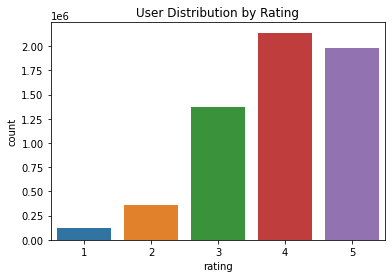

In [23]:
sns.countplot(x="rating", data=ratings_df)
plt.title('User Distribution by Rating')

Let's visualize the distribution of the userss ratings, to see which users we can filter out

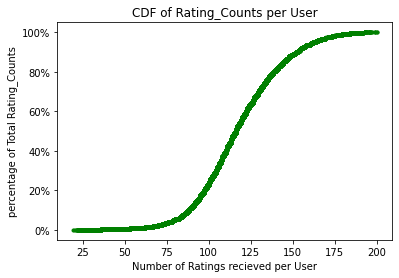

In [24]:
ratings_per_user = ratings_df.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)
def ecdf(array):
    """we compute empirical cummulative distribution function  for 1D array of measurement data."""
    x = np.sort(array)  #sort array to use as the x axis  
    cdf = np.cumsum(np.sort(array))# Create an array that will store cumulative count value
    y = cdf/np.amax(cdf) #normalize the array 
    return x,y

fig, ax = plt.subplots()
x,y = ecdf(ratings_per_user.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='green');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xlabel('Number of Ratings recieved per User');
ax.set_ylabel('percentage of Total Rating_Counts');
ax.set_title('CDF of Rating_Counts per User');

plt.show()
plt.show()

Remove less active users

In [25]:
threshold_ratings_per_user = ratings_per_user [ratings_per_user['rating']<=50]

# Define a function to create a filter to only add the data that fits our criteria
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = False
    else:
        dataframe = True
    return dataframe

inactive_user_ids = list(set(threshold_ratings_per_user.user_id))

#The users with ratings less than 50 will be in the list above, so when we apply Boolean Mask it won't be added to the dataframe
Filter = ratings_df.user_id.apply(lambda x:Filtered(x,inactive_user_ids))

ratings_df= ratings_df[Filter]

In [26]:
ratings_df.shape

(5940836, 3)

In [27]:
ratings_df.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Filter Books with Fewer Ratings

In [28]:
ratings_per_book = ratings_df.groupby('book_id')['rating'].count().reset_index().sort_values('rating', ascending=False)

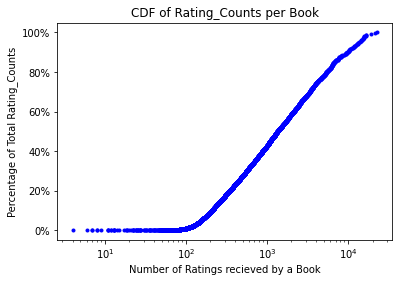

In [29]:
fig, ax = plt.subplots()
x,y = ecdf(ratings_per_book.rating)
ax.plot(x, y, marker = '.', linestyle='none',color='blue');
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
ax.set_xscale('log');
ax.set_xlabel('Number of Ratings recieved by a Book');
ax.set_ylabel('Percentage of Total Rating_Counts');
ax.set_title('CDF of Rating_Counts per Book');

plt.show()

In [30]:
threshold_ratings_per_book = ratings_per_book[ratings_per_book['rating']<=3000]
book_ids_with_few_ratings = list(set(threshold_ratings_per_book.book_id))

In [31]:
Filter = ratings_df.book_id.apply(lambda x:Filtered(x,book_ids_with_few_ratings))
ratings_df = ratings_df[Filter]

In [32]:
ratings_df.shape

(1938547, 3)

**Merge appropriate datasets**

Now let's work with the 'tag_id' column. It is present in tags.csv, 'book_tags.csv'. So, we can merge these two.

In [33]:
book_tags_df = book_tags_df.drop_duplicates()#We saw in the beginning tha the dataset had duplicates, so we are removing them.

In [34]:
book_tags_df = book_tags_df.merge(tags_df, on = 'tag_id') #merging the book_tags and tags dataset, based on the tags_id column

In [35]:
book_tags_df.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


goodreads_book_id column is common for 'book_tags.csv' and 'books.csv'. We an combine updated 'book_tags.csv' with 'book.csv'

In [36]:
tag_table = book_tags_df.merge(books_df[['goodreads_book_id', 'title']], on = 'goodreads_book_id') #merge book_tags_df with the goodreads_book_id and title columns of books_df

In [37]:
tag_table.head()

,goodreads_book_id,tag_id,count,tag_name,title
0,1,30574,167697,to-read,Harry Potter and the Half-Blood Prince (Harry ...
1,1,11305,37174,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
2,1,11557,34173,favorites,Harry Potter and the Half-Blood Prince (Harry ...
3,1,8717,12986,currently-reading,Harry Potter and the Half-Blood Prince (Harry ...
4,1,33114,12716,young-adult,Harry Potter and the Half-Blood Prince (Harry ...


tag_table contains all the tag_names that have been used by different users to catgorize the books.

**Cleaning the tag_table**

*Remove non-english values*

In [38]:
tag_table.tag_name.nunique() #check number of unique values

34252

In [39]:
#Lets filter out tags rows with non - ascii characters
tag_table =tag_table[~tag_table['tag_name'].str.contains(r'[^\x00-\x7F]+')]

#Check the number of unique values afterwards
tag_table.tag_name.nunique()

32963

In [40]:
#Same for the title
tag_table =tag_table[~tag_table['title'].str.contains(r'[^\x00-\x7F]+')]
tag_table.title.nunique()

9814

Remove tags that are not used a lot

In [41]:
tag_table_short = tag_table[['goodreads_book_id','tag_id','tag_name']] #include only the three columns
books_per_tag = tag_table_short.groupby(['tag_id','tag_name']).count().sort_values(by='goodreads_book_id',ascending = False)
books_per_tag.rename(columns = {'goodreads_book_id':'Number of Books'}, inplace = True) #for how many books a certain tag has been used
books_per_tag.head()

,,Number of Books
tag_id,tag_name,
30574,to-read,9834
11557,favorites,9734
22743,owned,9711
5207,books-i-own,9660
8717,currently-reading,9631


In [42]:
tags_keep = books_per_tag.index[books_per_tag['Number of Books']>300].tolist() #Keep tags that have been used to describe more than 300 books
tag_id_keep, tag_names_to_keep = zip(*tags_keep) #Combine these columns

In [43]:
# Define a function to create a Boolean Mask 
def Filtered(dataframe,List):
    if dataframe in List:
        dataframe = True
    else:
        dataframe = False
    return dataframe

#Filter returns Dataset that only includes tags that are in the tag_id_keep list(tags that have more than 300 instances)
Filter = tag_table.tag_id.apply(lambda x:Filtered(x,tag_id_keep ))
#tag _table is updated to have only the values corresponding to tag_id_keep elements
tag_table = tag_table[Filter]
# Use the boolean mask to filter data
tag_table.nunique()

goodreads_book_id    9850
tag_id                500
count                9305
tag_name              500
title                9814
dtype: int64

**Further Data Processing on the tag_table**

Let's define functions to find custom categories. For example tag_name favorites may have several variations. So our aim is to find those variations and combine them as one.

In [44]:
import re

In [45]:
#Find custom categories based on a given pattern
def identify_custom_categories (tagname, pattern):
    prog = re.compile(pattern)
    matched_tags = []
    for row in tagname:
        result = prog.match(row)
        if bool(result) and row not in matched_tags:
            matched_tags.append(row)
    return matched_tags

#Replace those categories with a preferred name
def replace_custom_categories(tag_name, custom_names, preferred_category_name):
    if tag_name in custom_names:
        tag_name = preferred_category_name
    return tag_name

**Tags for Favorites**

In [46]:
pattern_for_Favorites = '\w*[-]?\w*[-]?[Ff]av\w*'
favorites_variations = identify_custom_categories(tag_table.tag_name, str(pattern_for_Favorites))

# Rename the custom tag_names as Favorite
preferred_name = 'Favorite'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,favorites_variations,preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos  = {}
KW_CategorY_Repos ['Category'] = ['Favorite']
KW_CategorY_Repos ['Possible Search KW'] = []
KW_CategorY_Repos ['Possible Search KW'].append(favorites_variations)

**Tags for Children**

In [47]:
# Identify custom tag_names with children
pattern_for_Children = '\w*[-]?[cC]hildren\w*'
custom_tags_for_Children = identify_custom_categories(tag_table.tag_name, str(pattern_for_Children))

# Identify custom tag_names with childhood
pattern_for_Childhood = '\w*[-]?[cC]hildhood\w*'
custom_tags_for_Childhood = identify_custom_categories(tag_table.tag_name, str(pattern_for_Childhood))

# Identify custom tag_names with kids
pattern_for_Kids = '\w*[-]?[kK]id\w*'
custom_tags_for_Kids = identify_custom_categories(tag_table.tag_name, str(pattern_for_Kids))

custom_tags_for_Children_books = custom_tags_for_Kids + custom_tags_for_Children + custom_tags_for_Childhood


In [48]:
# Rename the custom tag_names as Children Books
preferred_name = 'Children Books'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Children_books, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append('Children Books')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_Children_books)

**Tags for Adults**

This will include fiction (with different types), non-fiction

In [49]:
# Identify custom tag_names with the word fiction
pattern_for_Fiction = '\w*[-]?[fF]iction\w*'
custom_tags_for_Fiction = identify_custom_categories(tag_table.tag_name, str(pattern_for_Fiction))


# Identify some keywords that stood out while observing the dataframe and then do a search
searchfor = ['history', 'History','sci','mystery','Mystery','crime','Crime','Women','women','feminism','girl']
custom_tags_for_other_Adult_Books = tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))]
custom_tags_for_Adult_Books = list(custom_tags_for_other_Adult_Books) + custom_tags_for_Fiction

In [50]:
Custom_Tag_Fiction =  [x for x in custom_tags_for_Adult_Books if x in ['fiction','contemporary-fiction','adult-fiction',
                                                              'speculative-fiction','realistic-fiction', 
                                                              'general-fiction',  'literary-fiction','fiction-to-read', 
                                                              'modern-fiction',
                                                             'fiction-general', 'classic-fiction', 'historical-fiction','fiction-historical',
                                                                                  'historic-fiction']]

Custom_Tag_NonFiction =  [x for x in custom_tags_for_Adult_Books if x in ['nonfiction','non-fiction','non-fiction-to-read']]

In [51]:
preferred_name = 'Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_Fiction
, preferred_name))

preferred_name = 'Non-Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_NonFiction
, preferred_name))

In [52]:
# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_Fiction)

KW_CategorY_Repos ['Category'].append( 'Non-Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_NonFiction)

**Tags for Teen/YA Books (of all types)**

In [53]:
pattern_for_YA = '\w*[-]?[Yy]oung\w*'
searchfor = ['ya', 'juvenile','teen']
custom_tags_for_YA1 = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])
custom_tags_for_YA2 = identify_custom_categories(tag_table.tag_name, str(pattern_for_YA))
custom_tags_for_YA = custom_tags_for_YA1 + custom_tags_for_YA2

In [54]:
#Grouping different young adult tags
Custom_Tag_YoungAdult =  [x for x in custom_tags_for_YA if x in ['ya','ya-books','ya-lit', 'young-adult','youngadult', 'juvenile', 'ya-contemporary','teen']]
Custom_Tag_YoungAdult_Fantasy =  [x for x in custom_tags_for_YA if x in ['ya-fantasy','young-adult-fantasy']]
Custom_Tag_YoungAdult_Fiction =  [x for x in custom_tags_for_YA if x in ['ya-fiction','young-adult-fiction','juvenile-fiction', 'teen-fiction']]
Custom_Tag_YoungAdult_Romance =  [x for x in custom_tags_for_YA if x in ['ya-romance']]
Custom_Tag_YoungAdult_Paranormal =  [x for x in custom_tags_for_YA if x in ['ya-paranormal']]

In [55]:
#Rename the custom tag_names for Young Adult Books
preferred_name = 'Young-Adult'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult,preferred_name))

#Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append( 'Young-Adult')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult)

In [56]:
preferred_name = 'Young-Adult-Fantasy'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Fantasy
, preferred_name))

preferred_name = 'Young-Adult-Fiction'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Fiction
, preferred_name))

preferred_name = 'Young-Adult-Romance'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Romance
, preferred_name))

preferred_name = 'Young-Adult-Paranormal'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_YoungAdult_Paranormal
, preferred_name))


#Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append('Young-Adult-Fantasy')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Fantasy)

KW_CategorY_Repos ['Category'].append('Young-Adult-Fiction')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Fiction)

KW_CategorY_Repos ['Category'].append('Young-Adult-Romance')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Romance)

KW_CategorY_Repos ['Category'].append('Young-Adult-Paranormal')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_YoungAdult_Paranormal)

**Tags For Science**

In [57]:
Custom_Tag_Science = identify_custom_categories(tag_table.tag_name, str('[Ss]cience$'))
Custom_Tag_Science

preferred_name = 'Science'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_Science
, preferred_name))

KW_CategorY_Repos ['Category'].append( 'Science')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_Science)

**Tags for History**

In [58]:
Custom_Tag_History = identify_custom_categories(tag_table.tag_name, str('[Hh]istory\w*'))

preferred_name = 'History'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,Custom_Tag_History
, preferred_name))

KW_CategorY_Repos ['Category'].append( 'History')
KW_CategorY_Repos ['Possible Search KW'].append(Custom_Tag_History)

**Tags for Crime & Mystery**

In [59]:
searchfor = ['[mM]ystery$', '[cC]rime$']
custom_tags_for_Mystery_Crime = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])

preferred_name = 'Crime & Mystery'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Mystery_Crime
, preferred_name))

# Save all the names for favorites in a dictionary to help keyword search later in the project
KW_CategorY_Repos ['Category'].append(  'Crime & Mystery')
KW_CategorY_Repos ['Possible Search KW'].append(custom_tags_for_Mystery_Crime)

**Tags for Audio Books**

In [60]:
pattern_for_Audio_Books = '\w*[-]?[Aa]udi\w*'
custom_tags_for_Audio_Books = identify_custom_categories(tag_table.tag_name, str(pattern_for_Audio_Books))

preferred_name = 'Audio Books'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Audio_Books
, preferred_name))

**Tags for Ebooks**

In [61]:
pattern_for_Books = '\w*[-]?[bB]ook\w*'
custom_tags_for_Books = identify_custom_categories(tag_table.tag_name, str(pattern_for_Books))
#search tag names that have 'book' string in it, to seperate those that specifically mention ebooks

In [62]:
searchfor = ['e-books', 'ebooks','ebook','e-book','kindle-books','kindle']
custom_tags_for_Ebooks = list(tag_table.tag_name[tag_table.tag_name.str.contains('|'.join(searchfor))])

In [63]:
preferred_name = 'Ebooks'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Ebooks,preferred_name))

**Tags by Year of Reading**

In [64]:
pattern_for_4Digits = '\w*[-]?\w*[-]?\d{4}'
custom_tags_for_4Digits = identify_custom_categories(tag_table.tag_name, str(pattern_for_4Digits))

In [65]:
pattern_for_Year = '\w*[-]?\w*[-]?[2]\d{3}'
custom_tags_for_Year = identify_custom_categories(tag_table.tag_name, str(pattern_for_Year))

In [66]:
preferred_name = 'Books Read By Year'
tag_table.tag_name = tag_table.tag_name.apply(lambda x: replace_custom_categories (x,custom_tags_for_Year
, preferred_name))

In [67]:
#Check the tag_names after applying all these filters 
tag_table.tag_name.nunique()

380

**Create Cleaned Datasets**

In [68]:
tag_table_short = tag_table[['tag_id','tag_name','goodreads_book_id']]
frequency_per_tag = tag_table_short.groupby(['tag_name']).count().sort_values(by='goodreads_book_id',ascending = False)
frequency_per_tag.rename(columns = {'goodreads_book_id':'Frequency'}, inplace = True)

In [69]:
tag_table_short = tag_table[['tag_name','goodreads_book_id']]
tag_table_short.loc[tag_table_short.duplicated (keep = False),:]
books_per_tag = tag_table_short.drop_duplicates()

In [70]:
# Make a dataframe for category keyword search
Keyword_Repository = pd.DataFrame.from_dict(KW_CategorY_Repos)
Keyword_Repository.head()

,Category,Possible Search KW
0,Favorite,"[favorites, favourites, all-time-favorites, fa..."
1,Children Books,"[kids, kids-books, kid-lit, kid-books, childre..."
2,Fiction,"[fiction, contemporary-fiction, adult-fiction,..."
3,Non-Fiction,"[nonfiction, non-fiction, non-fiction-to-read]"
4,Young-Adult,"[ya, teen, juvenile, ya, teen, juvenile, ya-bo..."


**Export Cleaned Dataset**

These will be used for data analysis, which will help us understand based on what to create the recommender system

In [71]:
Keyword_Repository.to_csv('Category_Keyword_Respository.csv', encoding = 'utf-8')
tag_table.to_csv('Clean_Tag_Table.csv', encoding = 'utf-8')
frequency_per_tag.to_csv('Clean_Data_for_Tag_Frequency.csv', encoding = 'utf-8')
books_per_tag.to_csv('Clean_Data_for_Books_Per_Tag.csv',encoding = 'utf-8')
ratings_df.to_csv('Ratings_Cleaned_Data.csv', encoding = 'utf-8')


In [72]:
Keyword_Repository

,Category,Possible Search KW
0,Favorite,"[favorites, favourites, all-time-favorites, fa..."
1,Children Books,"[kids, kids-books, kid-lit, kid-books, childre..."
2,Fiction,"[fiction, contemporary-fiction, adult-fiction,..."
3,Non-Fiction,"[nonfiction, non-fiction, non-fiction-to-read]"
4,Young-Adult,"[ya, teen, juvenile, ya, teen, juvenile, ya-bo..."
5,Young-Adult-Fantasy,"[ya-fantasy, ya-fantasy, ya-fantasy, ya-fantas..."
6,Young-Adult-Fiction,"[ya-fiction, ya-fiction, juvenile-fiction, ya-..."
7,Young-Adult-Romance,"[ya-romance, ya-romance, ya-romance, ya-romanc..."
8,Young-Adult-Paranormal,"[ya-paranormal, ya-paranormal, ya-paranormal, ..."
9,Science,[science]


In [73]:
ratings_df

,user_id,book_id,rating
0,1,258,5
5,2,26,4
7,2,33,4
8,2,301,5
12,4,70,4
...,...,...,...
5976341,35666,322,4
5976342,35666,192,2
5976349,20859,322,5
5976458,53358,253,5


## **Exploring/Analysing Data**

In the Exploratory Data Analysis, the datasets cleaned by data wrangling will be explored to get insights about reader's behavioral pattern, reading preferences and factors affecting a book's rating or an author's success.

In [74]:
ratings = pd.read_csv( '/content/Ratings_Cleaned_Data.csv' ) # ratings for different books
books_df = pd.read_csv( 'books.csv' ) # list of books and necessary info about the books
tag_frequency = pd.read_csv( '/content/Clean_Data_for_Tag_Frequency.csv' )
books_per_tag =  pd.read_csv( '/content/Clean_Data_for_Books_Per_Tag.csv' )
tag_table = pd.read_csv('/content/Clean_Tag_Table.csv')

In [75]:
ratings_df

,user_id,book_id,rating
0,1,258,5
5,2,26,4
7,2,33,4
8,2,301,5
12,4,70,4
...,...,...,...
5976341,35666,322,4
5976342,35666,192,2
5976349,20859,322,5
5976458,53358,253,5


**Prefered Categorizations**

Text(0.5, 1.0, 'Top 15 Tags Based on User Preferences')

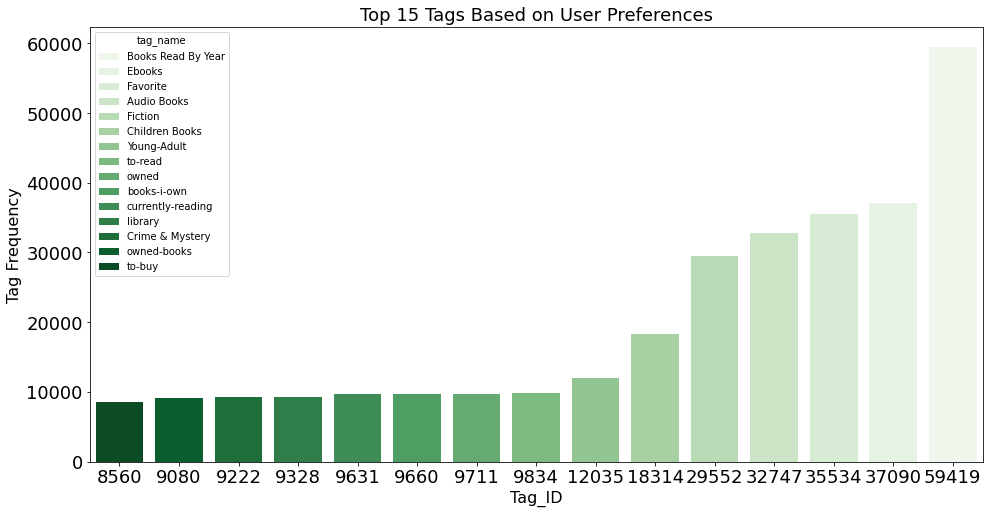

In [76]:
#Top 15 categories used by users 
plt.figure(figsize=(16, 8))
g = sns.barplot(x="tag_id", y="Frequency", hue = "tag_name",palette="Greens",data=tag_frequency[0:15][:],dodge=False)
plt.xlabel("Tag_ID", fontsize=16)
plt.ylabel("Tag Frequency", fontsize=16)
plt.xticks(  fontsize= 18)
plt.yticks(  fontsize= 18)
plt.title("Top 15 Tags Based on User Preferences",fontsize=18)

**Top 15 Books Put in Favorite Category**

In [77]:
tag_names_adult = ['Fiction', 'Non-Fiction','History','Crime & Mystery','Science','romance']
tag_names_to_ya = ['Young-Adult','Young-Adult-Fantasy','Young-Adult-Fiction','Young-Adult-Romance','Young-Adult-Paranormal']
tag_names_children = ['Children Books']
tag_names_to_keep = tag_names_adult + tag_names_to_ya + tag_names_children

#Top 15 Books Sheleved as Favorites
tag_table_pivot_table = tag_table.pivot_table(index = 'title', columns = 'tag_name', values = 'count', aggfunc='sum' )

#Make a list of tags for all grouped Generes and Favorites 
tag_names_to_keep_pivot_table = tag_names_to_keep + ['Favorite']
tag_table_pivot_table = tag_table_pivot_table[tag_names_to_keep_pivot_table]

#Drop cells with NaN in Favorites
tag_table_pivot_table.dropna(axis=0, subset=['Favorite']) 

#Rank the books in order of the times they have been tagged as Favorites
tag_table_pivot_table_sorted = tag_table_pivot_table.sort_values(by ='Favorite',ascending = False)
rank_limit = tag_table_pivot_table_sorted.shape[0]
tag_table_pivot_table_sorted['Rank'] = [x+1 for x in range(rank_limit )]

In [78]:
#Top 15 Favorite Books
Top_15_Fav =tag_table_pivot_table_sorted['Favorite'][0:15]
print('Top 15 books that were tagged as favorite \n')
Top_15_Fav 

Top 15 books that were tagged as favorite 



title
The Hunger Games (The Hunger Games, #1)                        61997.0
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       60036.0
Harry Potter and the Deathly Hallows (Harry Potter, #7)        50777.0
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    50256.0
The Fault in Our Stars                                         43330.0
Harry Potter and the Half-Blood Prince (Harry Potter, #6)      42610.0
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     38064.0
Pride and Prejudice                                            38053.0
To Kill a Mockingbird                                          37430.0
The Book Thief                                                 36551.0
Divergent (Divergent, #1)                                      34910.0
The Perks of Being a Wallflower                                28039.0
Mockingjay (The Hunger Games, #3)                              27367.0
The Great Gatsby                                               24368.0


**The Categories of These Books**

In [79]:
'''We will have to unpivot the top 15 books to put all the category columns into a single columm. We will keep the title column unchanged, 
the values under each column represents count. We will put them in the group.''' 

tag_table_pivot_table_sorted = tag_table_pivot_table_sorted.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(0.0, 50000.0)

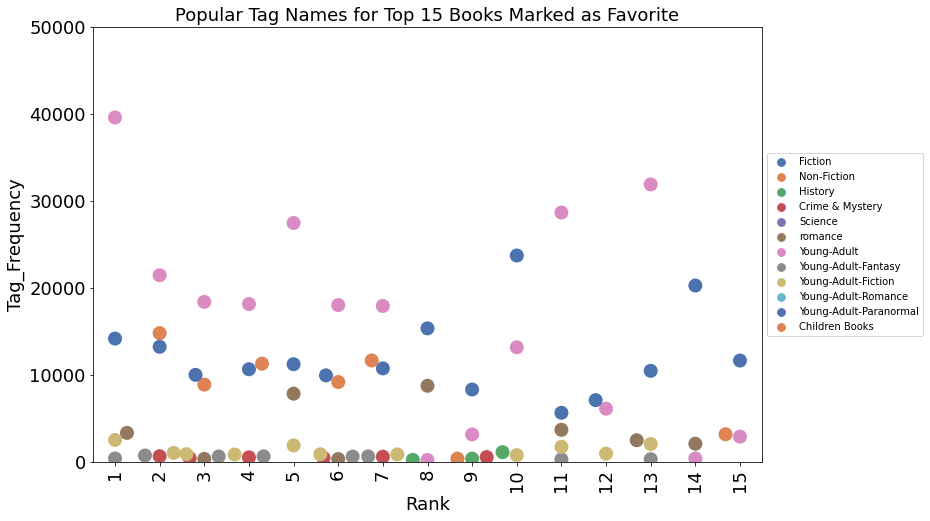

In [80]:
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted[0:15], value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
tag_table_pivot_table_melted.sort_values(by='count',ascending = False)

plt.figure(figsize = (12, 8))
sns.swarmplot(x = 'Rank' ,y = 'count', hue = 'tag_name', palette = 'deep',data = tag_table_pivot_table_melted, size= 14)

plt.xticks(rotation = 90,  fontsize=18)
plt.yticks(  fontsize= 18)
plt.xlabel('Rank', fontsize=18)
plt.ylabel( 'Tag_Frequency', fontsize= 18)
plt.title('Popular Tag Names for Top 15 Books Marked as Favorite',fontsize=18)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':10})
plt.ylim(0,50000)
plt.ylim(0,50000)

**Favorite Authors**

In [81]:
Filter = list(Top_15_Fav.index)
books_df.loc[books_df['original_title'].isin(Filter)]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
46,47,19063,19063,878368,251,375831002,9.780376e+12,Markus Zusak,2005.0,The Book Thief,...,1159741,1287798,93611,17892,35360,135272,377218,722056,https://images.gr-assets.com/books/1390053681m...,https://images.gr-assets.com/books/1390053681s...
67,68,22628,22628,2236198,128,671027344,9.780671e+12,Stephen Chbosky,1999.0,The Perks of Being a Wallflower,...,888806,954905,47116,14286,38658,143440,297501,461020,https://images.gr-assets.com/books/1167352178m...,https://images.gr-assets.com/books/1167352178s...
465,466,659469,659469,16998382,44,345368584,9.780345e+12,"Chuck Dixon, J.R.R. Tolkien, David Wenzel, Sea...",1989.0,The Hobbit,...,155338,159435,957,991,2180,14437,43107,98720,https://images.gr-assets.com/books/1374681632m...,https://images.gr-assets.com/books/1374681632s...


In [82]:
top_15_goodreads_book_id = list(tag_table.loc[tag_table['title'].isin(Filter)].goodreads_book_id.unique())
books_df.loc[books_df['goodreads_book_id'].isin(top_15_goodreads_book_id )]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
11,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
19,20,7260188,7260188,8812783,239,439023513,9.780439e+12,Suzanne Collins,2010.0,Mockingjay,...,1719760,1870748,96274,30144,110498,373060,618271,738775,https://images.gr-assets.com/books/1358275419m...,https://images.gr-assets.com/books/1358275419s...


In [83]:
Top_15_Fav_Books = books_df.loc[books_df['goodreads_book_id'].isin(top_15_goodreads_book_id )][['book_id','goodreads_book_id','authors','original_publication_year','original_title','ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']]

Top_15_Fav_Books.authors.value_counts()

J.K. Rowling, Mary GrandPré                4
Suzanne Collins                            2
Harper Lee                                 1
F. Scott Fitzgerald                        1
John Green                                 1
J.R.R. Tolkien                             1
Jane Austen                                1
Veronica Roth                              1
J.K. Rowling, Mary GrandPré, Rufus Beck    1
Markus Zusak                               1
Stephen Chbosky                            1
Name: authors, dtype: int64

**Top 15 Rated**

In [84]:
books_df['Total Reviews'] =  books_df[['ratings_1','ratings_2','ratings_3','ratings_4','ratings_5']].sum(axis = 1)
books_df['Avg Rating'] =  (books_df['ratings_1']*1 + books_df['ratings_2']*2 + books_df['ratings_3']*3 + books_df['ratings_4']*4 + books_df['ratings_5']*5)/books_df['Total Reviews']

books_ratings = books_df[['goodreads_book_id','original_title','authors','original_publication_year',
'Total Reviews','Avg Rating']]
Top_15_Rated = books_ratings.sort_values(by = 'Avg Rating',ascending = False)[0:15]
Top_15_Rated

,goodreads_book_id,original_title,authors,original_publication_year,Total Reviews,Avg Rating
3627,24812,The Complete Calvin and Hobbes,Bill Watterson,2005.0,29968,4.818306
3274,8,NaN,"J.K. Rowling, Mary GrandPré",2003.0,33424,4.772349
861,17332218,Words of Radiance,Brandon Sanderson,2014.0,108176,4.765142
7946,5031805,NaN,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,10784,4.763724
8853,95602,Mark of the Lion Trilogy,Francine Rivers,1993.0,9547,4.759087
4482,24814,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996.0,23429,4.754492
6360,70489,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996.0,17285,4.740989
421,862041,Complete Harry Potter Boxed Set,J.K. Rowling,1998.0,204125,4.740448
6919,24815,The Indispensable Calvin and Hobbes: A Calvin ...,Bill Watterson,1992.0,16911,4.730176
3752,10,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005.0,26274,4.727754


**Are Favorites More likely to be rated?**

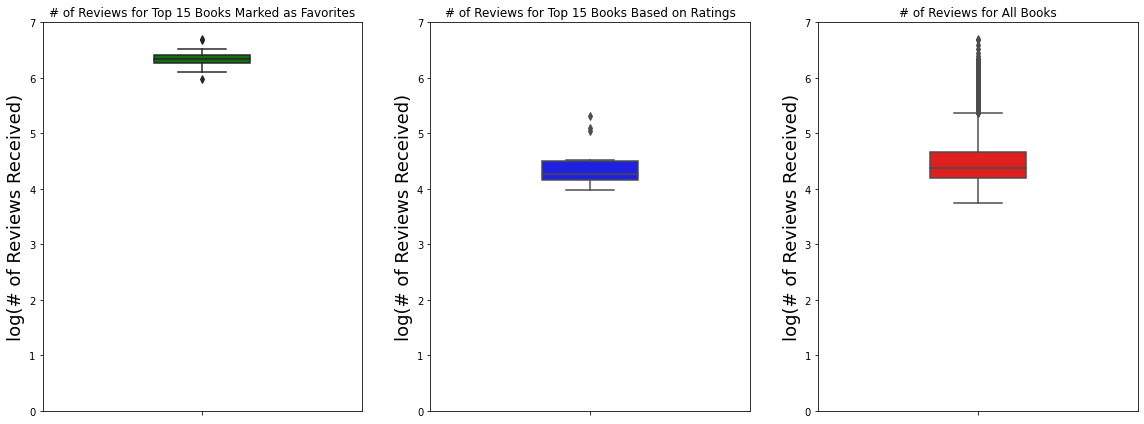

Median # of reviews for the books rated as favorite: 
 2191465.0
Median # of reviews for the top rated 15 books: 
 18198.0
Median # of reviews for all the the books: 
 23832.5


In [85]:
## Total Number of Ratings Recieved by Each of the Favorite Books and Highly Rated Books
Top_15_Fav_Books['Top_15_Fav_Books Reviews']  = books_df.loc[books_df['goodreads_book_id'].isin(top_15_goodreads_book_id )]['Total Reviews']

## Overlaying two boxplots in Seaborn
plt.figure(figsize = (16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y = np.log10(Top_15_Fav_Books['Top_15_Fav_Books Reviews']), width=0.3, color = 'green')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Marked as Favorites')


plt.subplot(1, 3, 2)
sns.boxplot(y = np.log10(Top_15_Rated['Total Reviews']), width=0.3 , color = 'blue')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = np.log10(books_df['Total Reviews']),width=0.3, color = 'red')
plt.ylabel('log(# of Reviews Received)', fontsize=18)
plt.ylim(0,7)
plt.title('# of Reviews for All Books')

plt.tight_layout()
plt.show()

print ('Median # of reviews for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Books Reviews']  .median())
print ('Median # of reviews for the top rated 15 books: \n',Top_15_Rated['Total Reviews'] .median())
print ('Median # of reviews for all the the books: \n',books_df['Total Reviews'] .median())

**Ratings of Favorite Books Compared with the Rest of the Books**

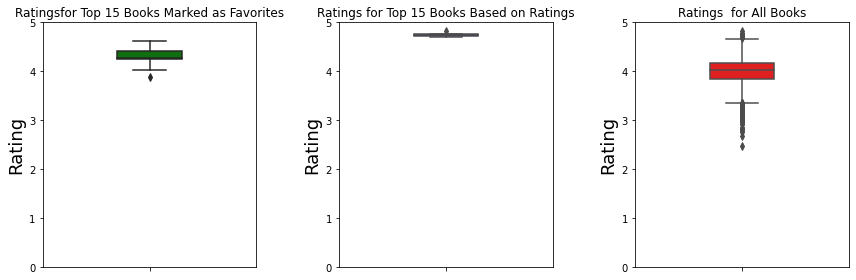

Median of the ratings for the books rated as favorite: 
 4.264217954505934
Median of the ratings for the books with high ratings: 
 4.740448254745867
Median of the ratings for all the the books: 
 4.018821797349181


In [86]:
## Total Number of Ratings Recieved by Each of the Favorite Books 
Top_15_Fav_Books['Top_15_Fav_Avg_Rating']  = (Top_15_Fav_Books['ratings_1']*1 + Top_15_Fav_Books['ratings_2']*2 + Top_15_Fav_Books['ratings_3']*3 + Top_15_Fav_Books['ratings_4']*4 + Top_15_Fav_Books['ratings_5']*5)/Top_15_Fav_Books['Top_15_Fav_Books Reviews']
books_df['Avg Rating'] =  (books_df['ratings_1']*1 + books_df['ratings_2']*2 + books_df['ratings_3']*3 + books_df['ratings_4']*4 + books_df['ratings_5']*5)/books_df['Total Reviews']

plt.figure(figsize = (12,4))
plt.subplot(1, 3, 1)
sns.boxplot(y = Top_15_Fav_Books['Top_15_Fav_Avg_Rating'], width=0.3, color = 'green')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratingsfor Top 15 Books Marked as Favorites')

plt.subplot(1, 3, 2)
sns.boxplot(y = Top_15_Rated['Avg Rating'],width=0.3, color = 'blue')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings for Top 15 Books Based on Ratings')

plt.subplot(1, 3, 3)
sns.boxplot(y = books_df['Avg Rating'],width=0.3,color = 'red')
plt.ylabel('Rating', fontsize=18)
plt.ylim(0,5)
plt.title('Ratings  for All Books')
plt.tight_layout()
plt.show()

print ('Median of the ratings for the books rated as favorite: \n',Top_15_Fav_Books['Top_15_Fav_Avg_Rating'] .median())
print ('Median of the ratings for the books with high ratings: \n',Top_15_Rated['Avg Rating'].median())
print ('Median of the ratings for all the the books: \n',books_df['Avg Rating'] .median())

**Create a New Recommendation Dataset**

In [87]:
# Filter out the top 5 tags received by each book and store them as a seprate column in the dataframe. 
tag_table_pivot_table_melted = pd.melt(tag_table_pivot_table_sorted, value_name='count',id_vars = ['title','Rank'])#.dropna()
tag_table_pivot_table_melted = tag_table_pivot_table_melted [tag_table_pivot_table_melted.tag_name != 'Favorite']
frequent_tb = tag_table_pivot_table_melted.sort_values(by='count',ascending = False).dropna()
frequent_tb['People Often Tagged as'] = pd.Series()
for book in frequent_tb.title:
    popular_tag = list(set(frequent_tb[frequent_tb.title == book].tag_name))
    Boolean_Mask = frequent_tb.title==book 
    idx = list(frequent_tb.index[Boolean_Mask])
   
    for i in idx:
        frequent_tb['People Often Tagged as'][i] = popular_tag[:5]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
idx =frequent_tb.groupby(['title'])['count'].transform(max) == frequent_tb['count']
book_tags = frequent_tb[idx].sort_values(by='count',ascending = False)
#Lets drop the column Rank
book_tags = book_tags.drop('Rank',axis = 1)

In [89]:
books_df['title'] = books_df["original_title"]
filter_b = books_df[['title','book_id','authors','Avg Rating',]]
tag_recom_dataset = filter_b.merge(book_tags, on ='title')
tag_recom_dataset.head() #new dataset

,title,book_id,authors,Avg Rating,tag_name,count,People Often Tagged as
0,To Kill a Mockingbird,4,Harper Lee,4.254818,Fiction,8328.0,"[Fiction, Crime & Mystery, History, Young-Adul..."
1,The Great Gatsby,5,F. Scott Fitzgerald,3.887376,Fiction,20283.0,"[romance, Fiction, Young-Adult]"
2,The Fault in Our Stars,6,John Green,4.264218,Young-Adult,27475.0,"[Young-Adult-Fiction, romance, Fiction, Young-..."
3,The Catcher in the Rye,8,J.D. Salinger,3.790131,Fiction,15520.0,"[Fiction, Young-Adult]"
4,Pride and Prejudice,10,Jane Austen,4.243559,Fiction,15356.0,"[romance, Fiction, Young-Adult, History]"


Average Rating of different Categories

In [90]:
#count total number of books in each category
count_books = tag_recom_dataset.groupby('tag_name').count().sort_values(by= 'count',ascending = False);
#calculate the % of books in each category
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
count_books.index

Index(['Fiction', 'Non-Fiction', 'Young-Adult', 'Children Books',
       'Crime & Mystery', 'romance', 'History', 'Science'],
      dtype='object', name='tag_name')

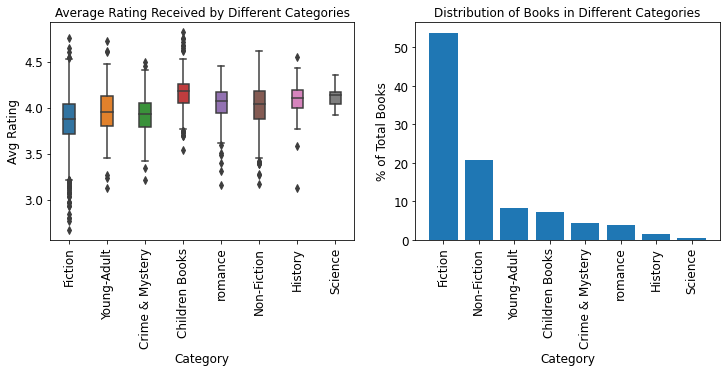

In [91]:
plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
sns.boxplot(x = tag_recom_dataset['tag_name'] ,y = tag_recom_dataset['Avg Rating'], width=0.3)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Avg Rating', fontsize=12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Average Rating Received by Different Categories")

plt.subplot(1, 2, 2)
total = count_books['count'].sum()
count_books ['count'] =[x*100/total for x in count_books['count']]
plt.bar (count_books.index, count_books['count'])
plt.xlabel('Category', fontsize=12)
plt.ylabel('% of Total Books', fontsize = 12)
plt.xticks(rotation = 90,  fontsize=12)
plt.yticks(  fontsize= 12)
plt.title("Distribution of Books in Different Categories")

plt.show()

**Comparing Ranking for Authors**

In [92]:
count_authors = tag_recom_dataset.groupby('authors').count().sort_values(by= 'count',ascending = False);
total = count_books['count'].sum()
#count_books ['count'] =[x*100/total for x in count_books['count']]
most_books_auth = count_authors['count'] [0:10]
most_books_auth 

authors
Stephen King          44
Dean Koontz           35
John Grisham          29
Nora Roberts          28
Jodi Picoult          21
Nicholas Sparks       15
Kurt Vonnegut Jr.     15
Mary Higgins Clark    15
Sidney Sheldon        15
Michael Crichton      14
Name: count, dtype: int64

In [93]:
# Find top authors by rating
Authors_by_Rating = tag_recom_dataset.groupby('authors').mean().sort_values(by= 'Avg Rating',ascending = False);
display(Authors_by_Rating ['Avg Rating'] )


authors
Bill Watterson                                                                                                                                                                                                              4.706259
Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth    4.651464
Angie Thomas                                                                                                                                                                                                                4.618345
Anonymous                                                                                                                                                                                                                   4.613276
Bill Watterson, G.B. Trudeau                                                

In [94]:
average_authors = tag_recom_dataset.groupby('authors').median()
author_rating = {'Author': [], 'Rating': []}
for author in most_books_auth.index:
    author_rating['Author'].append(author)
    author_rating['Rating'].append(average_authors.loc[author] ['Avg Rating'])
author_rating = pd.DataFrame.from_dict(author_rating)
author_rating

,Author,Rating
0,Stephen King,3.896395
1,Dean Koontz,3.817734
2,John Grisham,3.795866
3,Nora Roberts,4.005326
4,Jodi Picoult,3.799404
5,Nicholas Sparks,4.021555
6,Kurt Vonnegut Jr.,3.934352
7,Mary Higgins Clark,3.853492
8,Sidney Sheldon,3.680899
9,Michael Crichton,3.674956


<function matplotlib.pyplot.show>

<Figure size 1152x576 with 0 Axes>

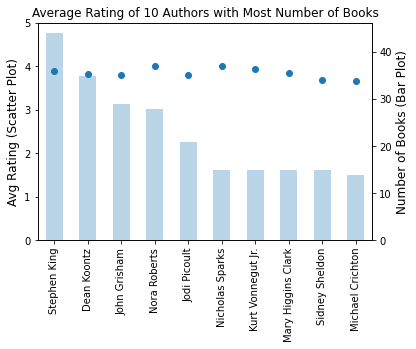

In [95]:
plt.figure(figsize = (16,8))
fig, ax1 = plt.subplots ()

ax2 = ax1.twinx()
ax1.scatter( author_rating.index, author_rating['Rating'])
#ax2.bar(most_books_auth.index,  most_books_auth.count)
ax2 = most_books_auth.plot(kind='bar',alpha = 0.3)

ax1.set_ylabel('Avg Rating (Scatter Plot)', fontsize=12)
ax2.set_ylabel('Number of Books (Bar Plot)', fontsize=12)
ax1.set_xticklabels(author_rating.Author,rotation= 90) 
ax1.set_ylim([0,5])
plt.title('Average Rating of 10 Authors with Most Number of Books')
plt.show

**Export the New Dataset**

In [96]:
tag_recom_dataset.to_csv('Dataset_for_tag&KW_recommendation.csv', encoding = 'utf-8')

**Conclusion**


*   Top 10 tag name shows that users prefer to have separate shelves for books they marked as favorite, read in a particular year (e.g. read in 1990, Childhood Books), owned or borrowed from library, read in a different format (e.g. ebook\ audiobook). The other shelving preferance per the top 10 tag_names were different book categories such as 'Fiction', 'Young - Adult' etc.
*   Based on the tag_counts of different book categories, it was found that 'Fiction' dominates as the popular category for users of all age groups 
*  An ideal metric to evaluate an author's demand in the market should include the number of books an author wrote, the ratings the books received, the number of books that has been marked as favorite, and the tag counts as favorite for each book.
*   When average ratings of different book categories were compared, it was found that readers do not have a bias towards rating a particular category higher than the others. 

**Datasets to be used for recommendation**

In [97]:
tag_recom_dataset.head()

,title,book_id,authors,Avg Rating,tag_name,count,People Often Tagged as
0,To Kill a Mockingbird,4,Harper Lee,4.254818,Fiction,8328.0,"[Fiction, Crime & Mystery, History, Young-Adul..."
1,The Great Gatsby,5,F. Scott Fitzgerald,3.887376,Fiction,20283.0,"[romance, Fiction, Young-Adult]"
2,The Fault in Our Stars,6,John Green,4.264218,Young-Adult,27475.0,"[Young-Adult-Fiction, romance, Fiction, Young-..."
3,The Catcher in the Rye,8,J.D. Salinger,3.790131,Fiction,15520.0,"[Fiction, Young-Adult]"
4,Pride and Prejudice,10,Jane Austen,4.243559,Fiction,15356.0,"[romance, Fiction, Young-Adult, History]"


In [98]:
ratings.head()

,Unnamed: 0,user_id,book_id,rating
0,0,1,258,5
1,5,2,26,4
2,7,2,33,4
3,8,2,301,5
4,12,4,70,4


## **Modeling**

In [99]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 23.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630141 sha256=41d6f2da124ec487a1a10b6aabfbc509a088d0cf48f3ad85f880d7fd35754b8a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [100]:
from surprise import NormalPredictor, BaselineOnly
from surprise import KNNWithMeans, KNNBasic
from surprise import SVD, NMF
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
import pandas as pd
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
import matplotlib.pyplot as plt

In [101]:
ratings = pd.read_csv('/content/Ratings_Cleaned_Data.csv')

In [102]:
ratings.shape


(1938547, 4)

In [103]:
ratings.head()

,Unnamed: 0,user_id,book_id,rating
0,0,1,258,5
1,5,2,26,4
2,7,2,33,4
3,8,2,301,5
4,12,4,70,4


In [104]:
ratings=ratings.drop( 'Unnamed: 0',axis=1);
ratings.shape

(1938547, 3)

In [105]:
reader = Reader(rating_scale=(0, 9))
ratings_sub = ratings[:100000]

data_set = Dataset.load_from_df(ratings_sub,reader)

#Split into test and train
train_set, test_set = train_test_split(data_set,test_size =0.2)

In [106]:
Model_Results = {}

**KNN Based**

In [107]:
knnmeans = KNNWithMeans(k=40, sim_options={'name': 'cosine', 'user_based': True}, min_k = 4)
knn_means_cv = cross_validate(knnmeans, data_set, measures=['RMSE', 'MAE'], cv=4, verbose=False)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [108]:
Model_Results['Model'] = ['KNNWithMeans']
Model_Results['Paramters']  = ['k=40, name: cosine, user_based: True,min_support = 4}']
Model_Results['RMSE']  = [knn_means_cv['test_rmse'].mean()]

In [109]:
knnbasic = KNNBasic(k=40, sim_options={'name': 'cosine', 'user_based': True}, min_k = 4)
knn_basic_cv = cross_validate(knnbasic, data_set, measures=['RMSE', 'MAE'], cv=4, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.9598  0.9650  0.9593  0.9643  0.9621  0.0026  
MAE (testset)     0.7663  0.7673  0.7661  0.7676  0.7668  0.0006  
Fit time          7.51    7.68    7.57    7.55    7.58    0.06    
Test time         10.71   12.53   10.97   10.85   11.26   0.73    


In [110]:
Model_Results['Model'].append('KNNBasic')
Model_Results['Paramters'].append('k=40, name: cosine, user_based: True,min_support = 4}')
Model_Results['RMSE'].append(knn_means_cv['test_rmse'].mean())

**Baseline Models**

In [111]:
nd =  NormalPredictor()
nd_cv = cross_validate(nd, data_set, measures=['RMSE', 'MAE'], cv=4, verbose=False)

In [112]:
Model_Results['Model'].append('Normal Predictor')
Model_Results['Paramters'].append('-')
Model_Results['RMSE'].append(nd_cv['test_rmse'].mean())

In [113]:
bo = BaselineOnly()
bo_cv = cross_validate(bo, data_set, measures=['RMSE','MAE'], cv =4, verbose =False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


In [114]:
Model_Results['Model'].append('BaselineOnly')
Model_Results['Paramters'].append('-')
Model_Results['RMSE'].append(bo_cv['test_rmse'].mean())

**Matrix Factorization Models**

In [115]:
svd = SVD(n_factors=30, n_epochs = 40, biased=False) 
svd_cv = cross_validate(svd, data_set, measures=['RMSE', 'MAE'], cv=4)

In [116]:
Model_Results['Model'].append('SVD')
Model_Results['Paramters'].append('n_factors=20, n_epochs = 30, biased=False')
Model_Results['RMSE'].append(svd_cv['test_rmse'].mean())

In [117]:
nmf = NMF(n_factors=30, n_epochs = 40, biased = True) 
nmf_cv = cross_validate(nmf, data_set, measures=['RMSE', 'MAE'], cv=4)

In [118]:
Model_Results['Model'].append('NMF')
Model_Results['Paramters'].append('n_factors=20, n_epochs = 30, biased = True')
Model_Results['RMSE'].append(nmf_cv['test_rmse'].mean())

**Models with Grid Search**

In [119]:
Model_Results_Grid = {}

In [120]:
parameters_svd = {'n_factors': [20,30,50], 'n_epochs': [50,100,200], 'lr_all': [0.005],'reg_all': [0.05], 'biased': [True, False]}
gs_svd = GridSearchCV(SVD, parameters_svd, measures=['rmse'], cv = 3, n_jobs=-1)
gs_svd.fit(data_set) 

In [121]:
Model_Results_Grid['Model']=['SVD']
Model_Results_Grid['Paramters']=[gs_svd.best_params]
Model_Results_Grid['RMSE']=[gs_svd.best_score['rmse']]

In [122]:
parameters_nmf = {'n_factors': [20,30,50], 'n_epochs': [20, 30,40,50],'biased': [False, True]}
gs_nmf = GridSearchCV(NMF, parameters_nmf, measures=['rmse'], cv=3, n_jobs=-1)
gs_nmf.fit(data_set)

In [123]:
Model_Results_Grid['Model'].append('NMF')
Model_Results_Grid['Paramters'].append(gs_nmf.best_params)
Model_Results_Grid['RMSE'].append(gs_nmf.best_score['rmse'])

**Results**

In [124]:
CF_Modeling_Results = pd.DataFrame.from_dict(Model_Results)
CF_Modeling_Results.sort_values(by = 'RMSE')

,Model,Paramters,RMSE
3,BaselineOnly,-,0.903196
0,KNNWithMeans,"k=40, name: cosine, user_based: True,min_suppo...",0.919767
1,KNNBasic,"k=40, name: cosine, user_based: True,min_suppo...",0.919767
4,SVD,"n_factors=20, n_epochs = 30, biased=False",0.926301
2,Normal Predictor,-,1.408436
5,NMF,"n_factors=20, n_epochs = 30, biased = True",1.634935


In [125]:
CF_Modeling_Results_Grid = pd.DataFrame.from_dict(Model_Results_Grid)
CF_Modeling_Results_Grid.sort_values(by = 'RMSE')

,Model,Paramters,RMSE
0,SVD,"{'rmse': {'n_factors': 30, 'n_epochs': 50, 'lr...",0.895464
1,NMF,"{'rmse': {'n_factors': 20, 'n_epochs': 20, 'bi...",0.914678


**Predicting Ratings with the Best Performing Model**

In [126]:
pred_data = ratings[100000:]

reader = Reader(rating_scale=(1, 5))

data_set = Dataset.load_from_df(pred_data,reader)

train , test = train_test_split(data_set, test_size = 0.3)


#For me SVD with the following parameters gave teh best result based on RMSE score 
svd = SVD(n_factors = 20, n_epochs = 50, lr_all =  0.005, reg_all = 0.05, biased = True)
svd.fit(train)
test_pred = svd.test(test)
accuracy.rmse(test_pred)

RMSE: 0.8587


0.8587295433218017

**Compare Predictied Ratings with Real ratings**

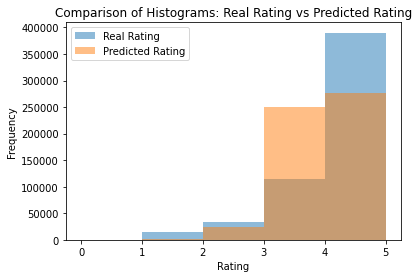

In [127]:
real_rating = []
predicted_rating = []

for user, item, rating in test:
    real_rating.append(rating)
    

for item in test_pred:
    predicted_rating.append((item[3]))


dataset = pd.DataFrame()
dataset ['Real Rating'] =real_rating
dataset ['Predicted Rating'] = (predicted_rating)
dataset [['Real Rating','Predicted Rating']].plot(kind='hist',bins=[0, 1, 2, 3, 4, 5], alpha=0.5) 
plt.xlabel('Rating')
plt.title('Comparison of Histograms: Real Rating vs Predicted Rating')
plt.show()

**Create and Exporting a Predictions Data Frame**



In [128]:
prediction = {'user_id': [], 'book_id': [],'Predicted Rating': [] }
test_pred = svd.test(test)

for element in test_pred:
    prediction['user_id'].append(element.uid)
    prediction['book_id'].append(element.iid)
    prediction['Predicted Rating'].append(element.est)
#prediction
prediction_dataframe = pd.DataFrame.from_dict(prediction)  
prediction_dataframe.to_csv('Rating_Prediction.csv', encoding = 'utf-8')

In [129]:
prediction_dataframe.shape

(551565, 3)

## **Recommendation System**

**Importing Final Datasets**

In [134]:
categories = pd.read_csv ('/content/Category_Keyword_Respository.csv')
user_rating_pred = pd.read_csv('/content/Rating_Prediction.csv')
book_info = pd.read_csv('/content/Dataset_for_tag&KW_recommendation.csv')

In [135]:
categories.head()

,Unnamed: 0,Category,Possible Search KW
0,0,Favorite,"['favorites', 'favourites', 'all-time-favorite..."
1,1,Children Books,"['kids', 'kids-books', 'kid-lit', 'kid-books',..."
2,2,Fiction,"['fiction', 'contemporary-fiction', 'adult-fic..."
3,3,Non-Fiction,"['nonfiction', 'non-fiction', 'non-fiction-to-..."
4,4,Young-Adult,"['ya', 'teen', 'juvenile', 'ya', 'teen', 'juve..."


In [136]:
user_rating_pred.head()

,Unnamed: 0,user_id,book_id,Predicted Rating
0,0,14077,281,3.831814
1,1,25398,219,3.908022
2,2,49689,72,3.828057
3,3,1022,25,4.041446
4,4,30834,136,3.622067


In [137]:
book_info.head()

,Unnamed: 0,title,book_id,authors,Avg Rating,tag_name,count,People Often Tagged as
0,0,To Kill a Mockingbird,4,Harper Lee,4.254818,Fiction,8328.0,"['Fiction', 'Crime & Mystery', 'History', 'You..."
1,1,The Great Gatsby,5,F. Scott Fitzgerald,3.887376,Fiction,20283.0,"['romance', 'Fiction', 'Young-Adult']"
2,2,The Fault in Our Stars,6,John Green,4.264218,Young-Adult,27475.0,"['Young-Adult-Fiction', 'romance', 'Fiction', ..."
3,3,The Catcher in the Rye,8,J.D. Salinger,3.790131,Fiction,15520.0,"['Fiction', 'Young-Adult']"
4,4,Pride and Prejudice,10,Jane Austen,4.243559,Fiction,15356.0,"['romance', 'Fiction', 'Young-Adult', 'History']"


In [138]:
book_info = book_info.drop( ['Unnamed: 0','count'],axis=1).sort_values(by = 'Avg Rating', ascending = False)
categories = categories.drop( ['Unnamed: 0'],axis = 1)

**Recommendation Functions**

In [139]:
def FixCase(st):
    return ' '.join(''.join([w[0].upper(), w[1:].lower()]) for w in st.split())

def recommend( user = None, cat = None, n = 5):
  if user != None: #if the this is an old user for whom we have data
    books_for_a_user = user_rating_pred[user_rating_pred.user_id == user] [['user_id','book_id','Predicted Rating']]
    columns = book_info[['book_id','title','tag_name','authors','People Often Tagged as']]
    book_repository = books_for_a_user.merge(columns, on = 'book_id') 
     
    if cat == None: #when they search for top n books
      Books = book_repository
    if cat != None: #if category is also searched
      # cat = FixCase(cat)
      # print(cat)
      if cat in list(categories.Category): #check if the category in search matches any categories in our book list
        Books = book_repository[book_repository.tag_name.str.match(pat = cat)] #if so, add it to the books dataset that is to  be recommended
      else: #if it doesn't exactly match any of the categories we use keywords we gathered in the Data Processing section
        all_selected_rows = pd.DataFrame()
        Books = pd.DataFrame()
        for item in categories['Possible Search KW']: #check if it matches any of the keywords for a certain category
          if cat in item: #if the searched category is in the list of possible searches of a certain category
            Boolean_Mask = categories['Possible Search KW']==item #boolean mask for that category name
            select_row  = Category = categories[Boolean_Mask]#apply the mask to select the row that has that category
            all_selected_rows = pd.concat([all_selected_rows, select_row])# gather all the rows (books),that had that category
          if not all_selected_rows.empty:
            Categories_Rec = list(all_selected_rows.Category)

        if all_selected_rows.empty: 
          print("No books with this category. You will be recommended top books.")
          Books = book_repository
        else:
          for Category in Categories_Rec:                                   
            book_row = book_repository[book_repository.tag_name.str.match(pat = str(Category))] #choose the books that have that category
            Books = pd.concat([Books,book_row]) # add it to the the books dataset that is to be recommended
    recommendation = Books.sort_values(by = 'Predicted Rating',ascending = False) [:n] #sort the recommendetion books list starting from the highest rating (showing top n)



  else: #in case this is a new user, for whom we have no data. We apply the same logic for category and author filtration as for the case with a known user
    if (cat == None): #only top n books
      Books = book_info
    if cat != None: #category is also searched
      #cat = FixCase(cat)
      if cat in list(categories.Category):
        Books = book_info[book_info.tag_name.str.match(pat = cat)]
      else:
        all_selected_rows = pd.DataFrame()
        Books = pd.DataFrame()
        for item in categories['Possible Search KW']:
          if cat in item:
            Boolean_Mask = categories['Possible Search KW']==item
            select_row  = Category = categories[ Boolean_Mask]
            all_selected_rows = pd.concat([all_selected_rows, select_row])
          if not all_selected_rows.empty:
            Categories_Rec = list(all_selected_rows.Category)

        
        if all_selected_rows.empty: 
          print("No books with this category. You will be recommended top ", n, "books.")
          Books = book_info
        else:
          for Category in Categories_Rec:
            book_row = book_info[book_info.tag_name.str.match(pat = str( Category))]
            Books = pd.concat([Books,book_row])          
    recommendation = Books.sort_values(by = 'Avg Rating',ascending = False) [:n]
        
  return recommendation        

**Demonstrate Results**

In [140]:
recommend(cat = 'crime')

,title,book_id,authors,Avg Rating,tag_name,People Often Tagged as
374,The Complete Sherlock Holmes,769,Arthur Conan Doyle,4.499320,Crime & Mystery,"['Children Books', 'Fiction', 'Crime & Mystery']"
2296,Sherlock Holmes: The Complete Novels and Stori...,5508,Arthur Conan Doyle,4.450116,Crime & Mystery,"['Fiction', 'Crime & Mystery']"
1410,The Exploits of Sherlock Holmes,3292,"Adrian Conan Doyle, John Dickson Carr",4.403299,Crime & Mystery,"['Fiction', 'Crime & Mystery']"
2243,The Improbable Adventures of Sherlock Holmes,5396,"John Joseph Adams, Robert J. Sawyer, Stephen K...",4.371475,Crime & Mystery,"['History', 'Fiction', 'Science', 'Crime & Mys..."
2770,"Innocent in Death (In Death, #24)",6763,J.D. Robb,4.362054,Crime & Mystery,"['romance', 'Fiction', 'Crime & Mystery']"


In [141]:
recommend(user = 9500, cat = 'ya')

,user_id,book_id,Predicted Rating,title,tag_name,authors,People Often Tagged as
2,9500,93,4.285613,The Secret Garden,Children Books,Frances Hodgson Burnett,"['Fiction', 'Crime & Mystery', 'Young-Adult-Fi..."
8,9500,6,4.248249,The Fault in Our Stars,Young-Adult,John Green,"['Young-Adult-Fiction', 'romance', 'Fiction', ..."
0,9500,164,4.199457,Eleanor & Park,Young-Adult,Rainbow Rowell,"['Fiction', 'Young-Adult-Fiction', 'romance', ..."


In [142]:
recommend(user = 9503, n = 8)

,user_id,book_id,Predicted Rating,title,tag_name,authors,People Often Tagged as
4,9503,10,4.356331,Pride and Prejudice,Fiction,Jane Austen,"['romance', 'Fiction', 'Young-Adult', 'History']"
5,9503,198,3.655102,The Color Purple,Fiction,Alice Walker,"['History', 'Fiction']"
1,9503,160,3.622686,Great Expectations,Fiction,Charles Dickens,"['romance', 'Fiction', 'Young-Adult']"
0,9503,90,3.619437,The Outsiders,Fiction,S.E. Hinton,"['Fiction', 'Crime & Mystery', 'Young-Adult-Fi..."
2,9503,49,3.554437,"New Moon (Twilight, #2)",Young-Adult,Stephenie Meyer,"['Fiction', 'Young-Adult-Fantasy', 'Young-Adul..."
3,9503,131,3.409463,The Grapes of Wrath,Fiction,John Steinbeck,"['History', 'Fiction', 'Young-Adult']"


In [143]:
recommend(n = 15)

,title,book_id,authors,Avg Rating,tag_name,People Often Tagged as
1554,The Complete Calvin and Hobbes,3628,Bill Watterson,4.818306,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
3572,Mark of the Lion Trilogy,8854,Francine Rivers,4.759087,Fiction,"['romance', 'Fiction', 'History']"
1890,It's a Magical World: A Calvin and Hobbes Coll...,4483,Bill Watterson,4.754492,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
2624,There's Treasure Everywhere: A Calvin and Hobb...,6361,Bill Watterson,4.740989,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
1601,"Harry Potter Collection (Harry Potter, #1-6)",3753,J.K. Rowling,4.727754,Young-Adult,"['Fiction', 'Crime & Mystery', 'Young-Adult-Fa..."
2951,Homicidal Psycho Jungle Cat: A Calvin and Hobb...,7254,Bill Watterson,4.713714,Children Books,"['Children Books', 'Fiction', 'Young-Adult']"
2169,The Days Are Just Packed: A Calvin and Hobbes ...,5207,Bill Watterson,4.684745,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
2328,The Calvin and Hobbes Lazy Sunday Book,5580,Bill Watterson,4.663535,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
3288,"The Absolute Sandman, Volume One",8109,"Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...",4.651464,Fiction,"['Fiction', 'Crime & Mystery']"
484,The Essential Calvin and Hobbes: A Calvin and ...,1010,Bill Watterson,4.645259,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."


In [144]:
recommend(user=51800)

,user_id,book_id,Predicted Rating,title,tag_name,authors,People Often Tagged as
1,51800,295,4.458212,11/22/63,Fiction,Stephen King,"['romance', 'History', 'Fiction', 'Crime & Mys..."
3,51800,239,4.394897,World War Z: An Oral History of the Zombie War,Fiction,Max Brooks,"['History', 'Fiction', 'Young-Adult', 'Science']"
2,51800,277,4.350916,The Ocean at the End of the Lane,Fiction,Neil Gaiman,"['Children Books', 'Fiction', 'Young-Adult']"
0,51800,62,4.006395,Northern Lights,romance,Philip Pullman,"['romance', 'Fiction', 'Crime & Mystery']"


In [145]:
recommend(cat = 'Children Books', n =7)

,title,book_id,authors,Avg Rating,tag_name,People Often Tagged as
1554,The Complete Calvin and Hobbes,3628,Bill Watterson,4.818306,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
1890,It's a Magical World: A Calvin and Hobbes Coll...,4483,Bill Watterson,4.754492,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
2624,There's Treasure Everywhere: A Calvin and Hobb...,6361,Bill Watterson,4.740989,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
2951,Homicidal Psycho Jungle Cat: A Calvin and Hobb...,7254,Bill Watterson,4.713714,Children Books,"['Children Books', 'Fiction', 'Young-Adult']"
2169,The Days Are Just Packed: A Calvin and Hobbes ...,5207,Bill Watterson,4.684745,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
2328,The Calvin and Hobbes Lazy Sunday Book,5580,Bill Watterson,4.663535,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
484,The Essential Calvin and Hobbes: A Calvin and ...,1010,Bill Watterson,4.645259,Children Books,"['Children Books', 'Non-Fiction', 'Fiction', '..."
